# Лабораторная работа 4. Модель однофазной  многоканальной замкнутой системы обслуживания

## Задание 1.

Вычислительный центр фирмы состоит из $m$ главных серверов коллективного пользования. Число работающих в в центре программистов в любой момент времени равно $k$. Каждый программист готовит свою программу и через терминал передает ее на сервер для выполнения, куда она сразу попадает. Время подготовки программ имеет экспоненциальное распределение со средним значением $t_{1}$ мин. Время выполнения программы на любом из серверов имеет экспоненциальное распределение со средним значением $t_{2}$ мин. Каждый программист ожидает ответа от сервера, прежде, чем начнет писать следующую программу.

Найти (теоретически и экспериментально):
 - вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал;
 - среднее время до получения пользователем результатов реализации;
 - среднее количество программ, ожидающих выполнения на сервере.
 
 Требуется выполнить расчет при заданном по варианту значении $m$, а также при $m=1$.

## Многоканальная замкнутая СМО

$S_0$ — все программисты пишут программы, очереди нет, сервера свободны;

$S_1$ — один программист ждет завершения программы, сервер занят — выполняет программу, очереди нет;

$S_2$ — два программиста ждут завершения программы, 2 сервера заняты, очереди нет;

$\ldots$

$S_n$ — n программистов ждут завершения программы, все сервера
заняты, очереди нет;

$S_{n+1}$  — n + 1 программистов ждут завершения программы, все сервера заняты, 
n программ выполняется, одна стоит в очереди;

$\ldots$

Sk — все программисты ждут завершения программы, n программ выполняется, 
k — n ждут в очереди.

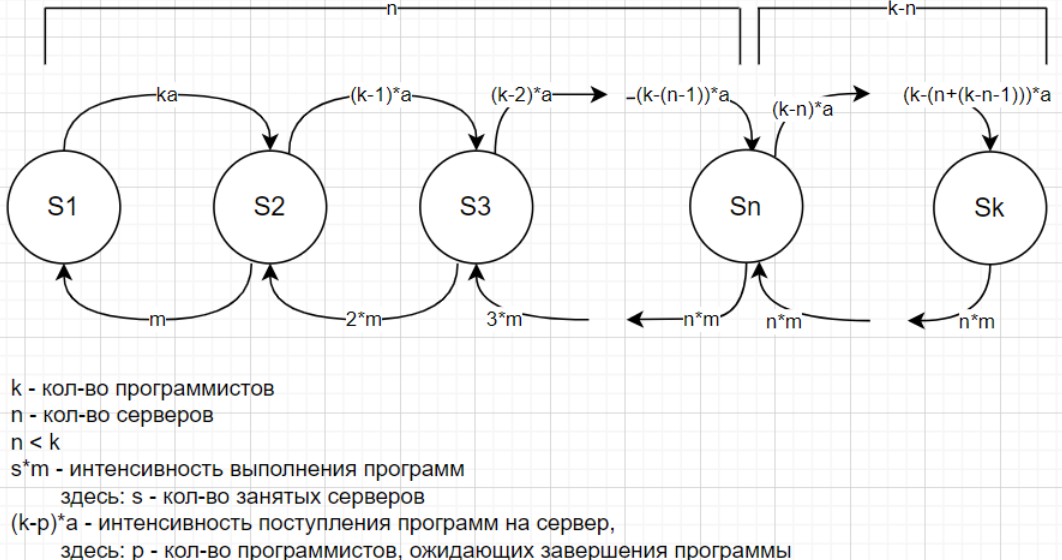

Здесь $$\lambda=a, \mu=m$$

Полученный граф состояний соответствует схеме размножения гибели с бесконечным количеством состояний. Естественное условие существования финальных вероятностей  - это $\frac{\lambda}{n\mu}<1$.

Формула разможения гибели:
$$P_0=\left(1+\sum_{k=1}^n\frac{\prod_{i=1}^k\lambda_i}{\prod_{i=1}^k \mu_i}\right)^{-1}\tag{25}$$

Применяя формулы размножения гибели, найдем финальные вероятности.
Обозначим $y=\frac{\lambda}{\mu}$, получим:


$$P_0=(1+\frac{ky}{1!}+\frac{k(k-1)y^2}{2!}+\frac{k(k-1)(k-2)y^3}{3!}+\ldots+\frac{k(k-1)\cdots(k-(n-1))*y^n}{n!}+\frac{k(k-1)\cdots(k-n)y^ny}{n!n}+$$

$$+\frac{k(k-1)\cdots(k-(n+1))y^ny^2}{n!n^2}+\ldots+\frac{k!y^k}{n!n^{k-n}})^{-1}$$

$$P_0=\left(\sum_{i=0}^n\frac{k!y^i}{(k-i)!i!}+\sum_{i=n+1}^k\frac{k!y^{i}}{n! n^{i-n}(k-i)!}\right)^{-1}$$

Воспользуемся данной формулой процесса размножения гибели:
$$P_k=\frac{\prod_{i=1}^k \lambda_i}{\prod_{i=1}^k \mu_i}\cdot P_0\tag{24}$$
Получаем
$$P_1=\frac{ky}{1!}\cdot P_0, P_2=\frac{k(k-1)y^2}{2!}\cdot P_0, \ldots, P_{i=n}=\frac{k!y^i}{(k-i)!i!}\cdot P_0\tag{13}$$
$$\cdots, P_{i=k}=\frac{k!y^i}{(k-i)!n!n^{i-n}}\cdot P_0\tag{14}$$

Найдем основные характеристики эффективности СМО. 

**Вероятность образования очереди (задание 1)**:
$$P_{\text{оч}}=\sum_{i=n+1}^k p_i = P_0 \sum_{i=n+1}^k\frac{k!y^{i}}{n! n^{i-n}(k-i)!}$$

**Среднее число занятых серверов (среднее число программ, которые выполняются)**
$$L_{об}=\sum_{i=0}^{n-1}i p_i + n \sum_{i=n}^i p_i = \sum_{i=0}^{n-1}i p_i + n(1 - \sum_{i=0}^{n-1} p_i)$$

$$L_{об} = n - \sum_{i=0}^{n-1} (n-i) p_i$$

**Среднее число программ, находящихся в системе**
$$L_{сист} = \sum_{i=0}^k i p_i$$

**Среднее число заявок в очереди (задание 3)**:
$$L_{оч} = L_{сист} - L_{об}$$
или $$L_{оч} = \sum_{i=n+1}^k (i-n) p_i $$

**Интенсивность потока**
$$\Lambda = (k-L_{сист}) \lambda $$
**Среднее время в системе (задание 2)**
$$T_{сист} = L_{сист} / \Lambda $$

Функции для эксперимента

In [1]:
DelFirst<-function(array) {
  newArr <- list()
  if (length(array) > 1) {
    newArr = array[2:length(array)]
  } else {
    newArr = list()
  }
  return (newArr)
}

In [2]:
SumTExecutes<-function(tEx) {
  if (length(tEx) == 0) {
    return (0)
  }
  
  sum<-0
  for (i in 1:length(tEx)) {
    sum = sum + tEx[[i]][1]
  }
  return (sum)
}

Генерация значений по условию

In [4]:
# многоканальная - серверов несколько
# замкнутая - программист ожидает ответа от сервера

Variant<-9
set.seed(Variant)
k<-sample(c(10:25),1)
mm<-sample(c(3:6),1)
t1<-sample(c(14:20),1)
t2<-sample(c(2:5),1)
View(data.frame(k,mm,t1,t2))

k  mm t1 t2
1 20 3  19 4

Флаг для печати сообщений и кол-во генерируемых значений

In [5]:
msg <- 0
N <- 10000

Установка кол-ва серверов (m=1 или по варианту = mm)

In [6]:
m <- mm

### Эксперимент

Переменные для эксперимента

In [7]:
timesPrepare<-rexp(N,1/t1)
timesExecute<-rexp(N,1/t2)
timesPrepare
timesExecute

# кол-во программ, выполнимых сразу же, как только поступят в очередь
executeAtOnce<-0
executesAtOnce<-c()
# время в очереди (суммарное для всех серверов)
timesWait<-c()
# время в очереди / длину очереди во все моменты поступления (в очередь) и выполнения (ухода из очереди) программ
timesQueue<-c()
timeWork<-0
# текущая длина очереди
curQueueLength <- 0

# время, оставшееся для завершения подготовки программ для k программистов
# в конце работы массив будет заполнен нулями
# на этот раз сортировать не будем (будем только искать мин.), чтобы не терять соответствие с номерами программ
timesProgrammers<-timesPrepare[1:k]
timesProgrammers

prepareNumber<-k+1
executeNumber<-1

# вместо 1одной очереди - несколько (m), программа будет ставиться в наименьшую очередь
# tExecutes - время, оставшееся до завершения выполнения программ в очереди для каждого из m серверов
tExecutes<-list()
for (i in 1:m) {
  tExecutes[[i]] <- list()
}
# tExecutes[serverNumber][numberInQueue][0 or 1, 0 - time, 1 - number of programmer]
tExecutes

# состояния программ (0 - выполняется программистом, 1 - в очереди на выполнение / уже выполняется на сервере)
prStates<-seq(0, 0, length.out=k)

n <- 1
isBreak <- 0

[1] 1.493555e+01 2.223780e+01 6.410332e+00 1.115635e-01 1.704995e+01
    [6] 1.846451e+01 2.140257e+01 1.344414e+01 4.646729e+01 2.419776e+01
   [11] 2.319109e+01 2.641973e+00 1.322809e+01 1.070307e+01 3.628286e+01
   [16] 8.411211e+00 2.747688e+00 3.452765e+01 2.417288e+01 3.787651e+01
   [21] 1.226969e+01 6.781696e+00 3.340261e+01 3.345793e+00 3.159237e+00
   [26] 6.146074e+00 9.445120e+00 5.477458e+00 2.915083e+01 3.476348e+01
   [31] 1.849333e+01 2.271951e+01 4.124877e+01 3.379005e+00 1.912443e+01
   [36] 4.765490e-01 1.119327e+01 3.107720e+01 3.633298e+01 5.663824e+00
   [41] 1.272759e+01 3.868117e+01 4.658415e+01 2.240615e+01 3.917052e+01
   [46] 1.345589e+01 3.197852e+01 5.126801e+01 2.605449e+01 2.844055e+01
   [51] 4.959767e+01 8.646816e+00 3.153503e+01 1.954596e+00 1.590786e+01
   [56] 3.915729e+01 3.844586e+00 2.891167e+01 7.469930e-01 1.667421e+01
   [61] 2.783017e+01 1.558634e+01 3.612386e+00 1.952375e+00 5.640740e+00
   [66] 2.222180e+01 3.888724e-01 4.207741e+00 1.508528e+00 6.805529e+00
   [71] 2.658049e+00 5.228307e+00 1.634105e+01 1.527070e+01 4.579420e+01
   [76] 3.723242e+01 9.775890e+00 2.476419e+01 9.618734e+00 9.317548e+00
   [81] 4.244372e+01 2.877479e+00 5.300655e+01 3.914411e+01 2.553368e+01
   [86] 1.765384e+01 8.163473e+00 2.352186e+01 1.065271e+01 2.242898e+00
   [91] 1.595401e+01 2.953453e+01 7.401204e+00 1.631261e+00 1.976717e+01
   [96] 3.249853e+00 2.004223e+01 1.099870e+01 1.491335e+01 6.579419e+01
  [101] 3.621156e+00 2.172967e+01 7.513406e-01 2.862500e+01 4.355780e+00
  [106] 3.591367e+01 2.468628e+01 1.855164e+01 1.322826e+01 1.039753e+00
  [111] 1.096065e+01 2.604705e+01 4.126100e+01 2.206059e+01 1.221882e+01
  [116] 3.129937e+01 3.353306e+00 2.676175e+01 2.417651e+01 8.905004e+00
  [121] 6.127244e+00 2.995084e+01 6.230247e-01 3.519864e+01 4.984114e+00
  [126] 5.443739e+01 2.355788e+00 1.235136e+01 2.604290e+00 3.604211e+00
  [131] 7.992840e+00 1.140199e+01 2.395915e+01 3.756792e-01 4.227835e+01
  [136] 7.286837e+00 8.223694e+00 4.376882e+00 2.724404e+00 2.012095e+00
  [141] 4.598780e+00 6.717486e+00 9.204705e-02 1.151461e+01 2.361470e+01
  [146] 7.321426e+00 3.019241e+01 3.708150e+01 1.065439e+00 6.958036e+01
  [151] 9.645108e+00 1.942488e+01 7.427634e+01 3.427248e+01 1.299106e+01
  [156] 1.960103e+00 5.374114e+01 2.492984e+01 5.476137e+01 2.410900e+01
  [161] 4.418274e+00 7.242273e+00 2.227468e+01 1.852130e+01 2.790373e+00
  [166] 7.393172e-02 1.468382e+01 6.664263e+01 1.031602e+01 7.880710e+00
  [171] 1.605389e+01 2.694954e+01 5.617222e+01 3.614890e+01 1.817517e+01
  [176] 2.202060e+01 6.282725e-01 1.286528e+01 2.115309e+01 3.340136e-01
  [181] 2.522547e-01 2.331071e+01 5.068302e+00 3.243996e+00 1.539171e+01
  [186] 2.068186e+00 2.142439e+01 7.269580e+00 5.281457e+00 1.344306e+01
  [191] 3.133708e+01 4.452521e+00 1.418246e+01 2.235978e+01 2.370096e+01
  [196] 2.951052e+01 2.665892e+00 5.574285e+01 2.805579e+01 1.366683e+01
  [201] 2.518095e+01 2.445099e+01 1.957143e+01 6.422211e+01 5.452955e+00
  [206] 4.070946e-02 6.522940e+00 2.328879e+00 2.177723e+01 2.726669e+01
  [211] 2.549405e+00 1.987571e+00 1.354078e+00 3.005169e+01 6.497499e+00
  [216] 1.412672e+00 9.199558e+00 1.159725e+01 3.673834e+01 4.313655e+01
  [221] 4.383592e-01 3.604241e+01 8.713028e+00 3.030865e+01 3.695129e+00
  [226] 1.996507e+01 3.331463e+01 7.619087e+00 2.599513e+00 9.094462e+00
  [231] 5.410763e+00 3.001888e+01 3.766225e+00 2.740194e+01 6.477380e+00
  [236] 2.480364e+01 1.241571e+01 5.897319e+01 6.428493e+01 7.110672e-01
  [241] 8.778796e+00 1.705629e+01 7.807988e+00 8.613838e+00 7.818856e+00
  [246] 3.744486e+00 5.128687e+01 1.521440e+01 6.136638e-01 2.845184e+00
  [251] 3.048097e+00 6.310192e+00 4.277819e+00 9.197339e+01 2.529657e+01
  [256] 1.147103e+01 4.240661e+00 1.963419e+01 2.266854e+01 2.754832e+01
  [261] 1.994559e+01 3.393072e+01 6.759911e+00 8.583738e+00 3.177280e+01
  [266] 4.212891e+01 3.624160e+01 3.152258e+00 1.785272e-01 1.413158e+01
  [271] 1.554926e+01 3.358660e+00 6.151288e-01 1.325873e+01 2.

[1] 9.050191e+00 7.786249e+00 4.931962e-01 7.385842e+00 1.195176e+01
    [6] 2.205366e+00 3.962400e+00 3.677317e+00 5.010522e+00 4.278016e+00
   [11] 1.950629e+00 1.564122e+00 8.204442e+00 2.375972e+00 5.682297e+00
   [16] 3.013517e+00 1.185484e+01 7.975498e+00 8.622928e+00 2.415750e-01
   [21] 3.855362e+00 3.945466e+00 2.775726e+00 1.174202e+00 2.984804e+00
   [26] 1.650954e+00 1.173017e+00 9.463166e+00 1.402328e+00 5.041540e+00
   [31] 7.534047e+00 1.573597e-01 8.992432e+00 9.586105e+00 5.009409e+00
   [36] 3.590522e+00 2.678605e+00 2.344459e+01 6.346724e+00 8.924717e+00
   [41] 6.268980e+00 3.604119e+00 1.084536e+00 3.389736e+00 3.878098e+00
   [46] 3.856757e+00 1.830428e+00 1.296690e+01 1.011942e+00 5.683097e+00
   [51] 7.198460e-01 2.753854e+00 8.416082e+00 4.171396e-01 6.715679e-01
   [56] 1.017985e-01 7.173628e+00 1.211553e+01 1.722723e+01 5.798438e+00
   [61] 2.627948e+00 4.235408e-02 8.497633e-01 6.900801e+00 2.939236e-01
   [66] 1.804188e+00 2.736357e+00 6.091957e+00 3.707809e+00 6.215527e-02
   [71] 5.482427e+00 9.686568e+00 9.180808e+00 4.305408e-01 1.791407e+00
   [76] 7.258307e-01 2.682197e+00 2.599915e+00 1.368964e+01 2.594593e+00
   [81] 2.502534e-02 3.057397e+00 1.744652e+01 7.510024e+00 2.910399e+00
   [86] 7.146049e+00 5.243404e+00 9.950278e+00 4.118634e+00 5.666598e+00
   [91] 1.054171e+01 7.384275e+00 3.404124e+00 7.931943e+00 6.727583e+00
   [96] 1.768438e+00 1.495287e+00 3.715318e+00 2.429203e+00 2.655056e+00
  [101] 1.307899e+01 1.449568e+00 2.202157e+00 1.915974e+00 4.496715e+00
  [106] 3.765059e+00 6.984281e-01 8.171325e+00 4.214606e+00 1.953387e+00
  [111] 6.854913e+00 1.394111e+00 1.083082e+01 4.179375e-01 3.520213e+00
  [116] 1.991512e-01 3.525427e+00 6.184483e-01 2.463040e-01 2.461867e-02
  [121] 4.455060e+00 4.981818e+00 8.171905e+00 3.109130e-01 1.063947e+00
  [126] 4.748503e+00 2.106080e+00 7.959681e+00 4.325913e+00 1.786014e+01
  [131] 6.232840e-01 1.697577e+00 5.311951e+00 4.069116e+00 5.755029e+00
  [136] 1.401415e+00 1.085581e+01 6.442620e+00 9.915478e+00 1.754179e+00
  [141] 1.414544e+01 4.833290e+00 8.820968e+00 5.165634e+00 3.003832e-01
  [146] 2.824668e+00 2.666377e+00 6.193485e+00 5.066884e+00 5.443505e+00
  [151] 1.014360e+00 1.363257e+01 1.248471e+01 1.725307e+01 9.298286e-01
  [156] 1.227919e+00 8.159768e-01 1.051158e+01 3.959889e+00 9.163663e+00
  [161] 1.076173e+01 6.956398e-01 1.332850e+00 5.115816e+00 8.170488e+00
  [166] 3.788921e-01 2.549255e+00 3.737516e+00 9.345533e-01 1.203472e+00
  [171] 2.595574e+00 3.591464e+00 3.537609e-01 9.915018e-01 1.789755e+00
  [176] 1.711144e+00 1.220862e-01 4.170050e+00 4.035314e-01 1.239734e+00
  [181] 1.064707e+00 3.663023e+00 5.581601e-01 1.361135e+01 7.570073e+00
  [186] 6.500132e+00 1.177966e+00 1.185721e+00 2.071514e+01 2.201585e+00
  [191] 8.802944e-01 6.104246e+00 3.060707e+00 7.342284e-01 5.050112e+00
  [196] 4.265369e+00 1.044718e+01 1.183094e+01 1.615322e-01 2.369172e-01
  [201] 2.628978e+00 8.578245e-01 5.995280e+00 3.238025e-01 2.860716e+00
  [206] 3.062806e+00 8.137802e+00 3.022627e+00 1.768411e+00 3.860277e+00
  [211] 4.196500e+00 2.733266e+00 1.093003e+01 1.980833e+00 6.535569e+00
  [216] 3.228693e-02 9.580290e-01 3.517224e+00 4.300107e+00 1.646428e-01
  [221] 1.040724e+01 1.826987e+00 5.979642e-01 8.842692e+00 1.798977e+01
  [226] 2.627922e+00 8.617427e-01 2.390578e+00 4.342661e+00 5.391804e+00
  [231] 5.002634e+00 1.368903e+01 9.835105e+00 6.541389e-01 4.565091e+00
  [236] 4.220658e+00 1.145237e+01 1.374512e+00 1.338581e+00 1.287101e-01
  [241] 3.395210e+00 1.103937e+01 7.461903e-01 1.678674e-01 1.291994e+00
  [246] 5.584986e+00 2.645621e+00 3.923065e+00 4.838743e+00 1.064512e-01
  [251] 3.418220e+00 1.099457e+01 3.302753e+00 1.679838e+01 6.392276e+00
  [256] 4.529792e-02 3.728808e+00 2.816911e+00 1.038362e+00 2.691959e+00
  [261] 9.754100e+00 4.215520e-01 1.823345e+00 4.184027e+00 2.528906e+00
  [266] 1.041249e+00 5.538729e-01 1.832225e+00 8.469625e-02 3.609175e+00
  [271] 2.138455e+00 7.379145e+00 5.805001e+00 8.541392e-02 7.

[1] 14.9355520 22.2377951  6.4103324  0.1115635 17.0499542 18.4645086
 [7] 21.4025733 13.4441395 46.4672910 24.1977611 23.1910860  2.6419733
[13] 13.2280880 10.7030729 36.2828612  8.4112106  2.7476878 34.5276528
[19] 24.1728799 37.8765120

[[1]]
list()

[[2]]
list()

[[3]]
list()

Сам эксперимент

In [8]:
while (executeNumber <= N) {
  print(executeNumber)
  if (msg) {
    cat('№', n, ', ex:', executeNumber, ', prep:', prepareNumber, '\n')
    n = n + 1
    print("Текущее время подготовки программ:")
    print(timesProgrammers)
  }
  
  # наименьшее время подготовки
  tPrepareIndex<-0
  tPrepare<-0
  for (i in 1:k) {
    if (tPrepare == 0) {
      if (timesProgrammers[i] != 0) {
        tPrepare = timesProgrammers[i]
        tPrepareIndex<-i
      }
    } else {
      if (timesProgrammers[i] != 0 && timesProgrammers[i] < tPrepare) {
        tPrepare = timesProgrammers[i]
        tPrepareIndex<-i
      }
    }
  }
  
  # наименьшее оставшееся время выполнения
  tExecute<-0
  tExecuteIndex<-0
  for (i in 1:m) {
    if (length(tExecutes[[i]]) > 0) {
      if (tExecute == 0 || tExecutes[[i]][[1]][1] < tExecute) {
        tExecute = tExecutes[[i]][[1]][1]
        tExecuteIndex = tExecutes[[i]][[1]][2]
      }
    }
  }
  # если (tPrepare < tExecute) то программа ставится в очередь, иначе завершается программа на одном из серверов
  # и соответсвующий программист начинает выполнять новую программу
  tMin<-0
  if ((tExecuteIndex > 0 && tExecute > 0 && tExecute <= tPrepare) || (tPrepareIndex == 0 || tPrepare == 0)) {
    # завершилась программа на сервере
    tMin = tExecute
    # prStates[tExecuteIndex] = 0
  } else {
    if (tPrepareIndex > 0 && tPrepare > 0) {
      # программист доделал программу
      tMin = tPrepare
      # prStates[tPrepareIndex] = 1
    } else {
      cat('ОШИБКА в расчете tMin: ', tPrepareIndex, ' time:', tPrepare, '\n')
      break
    }
  }
  
  if (msg) {
    print("ВРЕМЯ ПОДГОТОВКИ:")
    print(tPrepare)
    print("ВРЕМЯ ЗАПУСКА:")
    print(tExecute)
    print("ВРЕМЯ МИНИМАЛЬНОЕ:")
    print(tMin)
  }
  
  # у остальных программ время подготовки уменьшается на время подготовки этой программы
  for (j in 1:length(timesProgrammers)) {
    if (timesProgrammers[j] != 0) {
      timesProgrammers[j] = timesProgrammers[j] - tMin
    }
  }
  if (msg) {
    print("Время подготовки для остальных программ:")
    print(timesProgrammers)
  }
  
  # поступает следующая программа, если была выполнена программа на одном из серверов,
  # если программист свободен и если программы еще не закончились
  if (tExecute == tMin) {
    if (tExecuteIndex > 0 && timesProgrammers[tExecuteIndex] == 0) {
      if (prepareNumber <= N) {
        timesProgrammers[tExecuteIndex] = timesPrepare[prepareNumber]
        prepareNumber = prepareNumber + 1
      }
    } else {
      if (timesProgrammers[tExecuteIndex] != 0) {
        print('ОШИБКА, программист не дождался выполнения своей программы')
        break
      }
    }
    
    if (msg) {
      print("Поступление новой программы:")
      print(timesProgrammers)
    }
  }
  
  
  # за время tMin выполняется программа c минимальным временем, для остальных уменьшается время их выполнения
  for (s in 1:m) {
    if (length(tExecutes[[s]]) > 0) {
      if (tMin == tExecutes[[s]][[1]][[1]]) {
        tExecutes[[s]] = DelFirst(tExecutes[[s]])
      } else {
        if (tMin < tExecutes[[s]][[1]][[1]]) {
          tExecutes[[s]][[1]] = c(tExecutes[[s]][[1]][1] - tMin, tExecutes[[s]][[1]][2])
        } else {
          cat('ОШИБКА в выполнении программ, неверно посчитано tMin:', tMin, 't[s]:', tExecutes[[s]][[1]][[1]])
          isBreak = 1
        }
      }
    }
  }
  if (isBreak) {
    break
  }

  if (msg) {
    print("Оставшиеся выполняться (после времени tMin) программы в очереди:")
    print(tExecutes)
  }
  
  # определение сервера с наименьшей нагрузкой
  
  # очередь с выполняющимися серверами
  minQueueLen<-0
  minQueueLenIndex<-1
  
  # без учета выполняющихся программ
  commonQueue <- 0
  commonQueueLength <- 0
  
  for (s in 1:m) {
    qLen <- SumTExecutes(tExecutes[[s]])
    
    # к заданию
    commonQueueLength = commonQueueLength + length(tExecutes[[s]])
    if (length(tExecutes[[s]]) > 0) {
      commonQueue = commonQueue + (qLen - tExecutes[[s]][[1]][[1]])
    }

    if (s == 1 || qLen < minQueueLen) {
      minQueueLen = qLen
      minQueueLenIndex = s
    }
  }
  
  if (msg) {
    print('Сервер с наименьшей нагрузкой:')
    print(minQueueLenIndex)
    print(minQueueLen)
  }
  
  # вычисления по заданию
  timeWork <- timeWork + tMin
  # при поступлении программы в очередь время ее ожидания = сумме времен ожидания всех программ в очереди
  if (tPrepare == tMin) {
    timesWait = append(timesWait, minQueueLen)
    
    # если в tExecutes[s] одна программа, то она сейчас выполняется
    # если 2 - то в очереди 1 программа и 1 выполняется и т.д
    if (minQueueLen == 0) {
      executeAtOnce = executeAtOnce + 1
      executesAtOnce = append(executesAtOnce, 1)
    } else {
      executesAtOnce = append(executesAtOnce, 0)
    }
  }
  if (curQueueLength <= m) {
    timesQueue = append(timesQueue, 0)
  } else {
    timesQueue = append(timesQueue, tMin * (curQueueLength - m))
    # timesQueue = append(timesQueue, commonQueue / commonQueueLength)
  }
  
  curQueueLength <- commonQueueLength
  
  # программа ставится в очередь, если она есть (её может не быть в конце дня)
  if (tPrepare == tMin) {
    if (tMin != 0) { 
      tExecutes[[minQueueLenIndex]][[ length(tExecutes[[minQueueLenIndex]]) + 1 ]] = c(timesExecute[executeNumber], tPrepareIndex)
      executeNumber = executeNumber + 1
    }
    
    if (msg) {
      print("Выполняющиеся программы в очереди:")
      print(tExecutes)
    }
  }
  
  
  # программы больше не поступают, значит те, что в очереди, просто выполним
  if (executeNumber > N) {
    for (i in 1:m) {
      if (length(tExecutes[[i]]) > 0) {
        for (q in 1:length(tExecutes)) {
          tExecutes[[i]] = DelFirst(tExecutes[[i]])
        }
      }
    }
    
    if (msg) {
      print("КОНЕЦ ДНЯ")
      print(tExecutes)
      print(timesProgrammers)
    }
  }
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 4
[1] 5
[1] 6
[1] 6
[1] 6
[1] 7
[1] 7
[1] 8
[1] 9
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 15
[1] 15
[1] 16
[1] 16
[1] 17
[1] 17
[1] 17
[1] 18
[1] 18
[1] 19
[1] 19
[1] 20
[1] 21
[1] 22
[1] 22
[1] 23
[1] 24
[1] 24
[1] 24
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 28
[1] 28
[1] 29
[1] 29
[1] 29
[1] 29
[1] 30
[1] 30
[1] 30
[1] 30
[1] 31
[1] 31
[1] 31
[1] 31
[1] 32
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 36
[1] 36
[1] 37
[1] 37
[1] 37
[1] 38
[1] 39
[1] 40
[1] 40
[1] 40
[1] 41
[1] 41
[1] 41
[1] 42
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 46
[1] 46
[1] 47
[1] 47
[1] 48
[1] 48
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 52
[1] 52
[1] 53
[1] 53
[1] 54
[1] 55
[1] 55
[1] 56
[1] 56
[1] 57
[1] 57
[1] 57
[1] 58
[1] 59
[1] 59
[1] 60
[1] 60
[1] 61
[1] 61
[1] 62
[1] 62
[1] 62
[1] 63
[1] 64
[1] 65
[1] 65
[1] 66
[1] 67
[1] 68
[1] 68
[1] 69
[1] 69
[1] 70
[1] 71
[1] 72
[1] 72
[1] 73
[1] 74
[1] 74
[1] 74
[1] 74
[1] 75
[1] 75
[1] 75
[1] 76
[1] 76
[1] 77
[1] 77
[1] 77
[1] 77
[1] 77

Итоговые значения эксперимента

In [9]:
# Вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал
PNoEmptyQueue<-(N-executeAtOnce)/N

# Cреднее время до получения пользователем результатов реализации (время в очереди + время выполнения программы на сервере)
timeWaitAndExecute_exp<-(sum(timesWait)+sum(timesExecute))/N

# среднее время ожидания в очереди (Wоч)
Lq_exp <- sum(timesQueue) / timeWork

Теоретические вычисления по выведенным формулам

Интенсивности

In [10]:
# теоретически
# lambda = k/t1, mu = 1/t2
# интенсивность поступления программ для k программистов
lambda <- 1/t1
# интенсивность выполнения программ
mu <- 1/t2
# отношение интенсивности поступления к интенсивности выполнения
y <- lambda/mu

К заданию 1

In [11]:
p0<-0
part1<-0
part2<-0
for (i in 0:m) {
  part1 = part1 + (factorial(k)*y^i)/(factorial(k-i)*factorial(i))
}
for (i in (m+1):k) {
  part2 = part2 + ((factorial(k)*y^i)/(factorial(k-i)*factorial(m)*m^(i-m)))
}
p0 = 1 / (part1 + part2)

# вероятность наличия очереди
Pq = p0 * part2
Pq

[1] 0.8109192

In [12]:
# вероятности остальных состояний
p = vector(mode="integer", length = k)
for (i in 1:m) {
  p[i] = p0 * ((factorial(k)*y^i)/(factorial(k-i)*factorial(i)))
}
for (i in (m+1):k) {
  p[i] = p0 * ((factorial(k)*y^i)/(factorial(k-i)*factorial(m)*m^(i-m)))
}
p

[1] 3.280480e-02 6.560959e-02 8.287528e-02 9.886875e-02 1.110105e-01
 [6] 1.168532e-01 1.148031e-01 1.047327e-01 8.819594e-02 6.808108e-02
[11] 4.777620e-02 3.017444e-02 1.694004e-02 8.321421e-03 3.503756e-03
[16] 1.229388e-03 3.450914e-04 7.265082e-05 1.019661e-05 7.155514e-07

In [13]:
# среднее число выполняемых программ
Lob_part2 <- 0
for (i in 0:(m-1)) {
  if (i == 0) {
    Lob_part2 = Lob_part2 + (m-i)*p0
  } else {
    Lob_part2 = Lob_part2 + (m-i)*p[i]
  }
}
Lob = m - Lob_part2
Lob

[1] 2.845407

In [14]:
# среднее число программ в системе
Ls <- 0
for (i in 0:k) {
  if (i == 0) {
    Ls = Ls + i*p0
  } else {
    Ls = Ls + i*p[i]
  }
}
Ls

[1] 6.484315

К заданию 3

In [15]:
# средняя длина очереди
Lq <- Ls - Lob
# или
Lq <- 0
for (i in (m+1):k) {
  Lq = Lq + (i-m)*p[i] 
}
Lq

[1] 3.638907

К заданию 2

In [16]:
# интенсивность потока
I <- (k-Ls)*lambda
# среднее время в очереди
Ts <- (Ls/I)

Итог

In [17]:
# ИТОГИ
results = data.frame(rows.names=c("P(оч!=0)","t2+Woч","Lоч"))
results['Численно'] = c(PNoEmptyQueue, timeWaitAndExecute_exp, Lq_exp)
results['Теоретически'] = c(Pq,Ts,Lq)

View(results)

rows.names Численно Теоретически
1 P(оч!=0)   0.861300 0.8109192   
2 t2+Woч     9.276760 9.1154819   
3 Lоч        3.345972 3.6389075